<a href="https://colab.research.google.com/github/LesterHernandez/SP1-AI/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) Preparaciones

In [563]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Miscellaneous Libraries
import os

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

1) Arreglo de dataset

In [564]:
raw_dataset = pd.read_csv("bank-full.csv", sep=";")
eval_dataset = pd.read_csv("bank.csv", sep=";")

raw_dataset.describe()

raw_dataset.columns = raw_dataset.columns.str.strip().str.lower()


In [565]:
raw_dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [566]:
# Lets make a copy
new_dataset = raw_dataset.copy()
copy_eval = eval_dataset.copy()

# Lets check for null values
# df.dropna()
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()
new_dataset = raw_dataset.copy()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [567]:
new_dataset.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## 2) Enconding

### Mapeo de valores


In [568]:
def yesorno(x):
  if x == "yes":
    return 1
  else:
    return 0

def job(x):
  if x== 'admin.':
    return 0
  elif x== 'blue-collar':
    return 1
  elif x== 'entrepreneur':
    return 2
  elif x=='housemaid':
    return 3
  elif x=='management':
    return 4
  elif x=='retired':
    return 5
  elif x=='self-employed':
    return 6
  elif x=='services':
    return 7
  elif x=='student':
    return 8
  elif x=='technician':
    return 9
  elif x=='unemployed':
    return 10
  else:
    return 11
def marital(x):
  if x== 'divorced':
    return 0
  elif x== 'married':
    return 1
  elif x== 'single':
    return 2
  else:
    return 3
def education(x):
  if x== 'primary':
    return 0
  elif x== 'secondary':
    return 1
  elif x== 'tertiary':
    return 2
  elif x=='high.school':
    return 3
  elif x=='illiterate':
    return 4
  elif x=='professional.course':
    return 5
  elif x=='university.degree':
    return 6
  else:
    return 7

def contacto(x):
  if x== 'cellular':
    return 0
  elif x== 'telephone':
    return 1
  else:
    return 2

def month(x):
  if x== 'jan':
    return 0
  elif x== 'feb':
    return 1
  elif x== 'mar':
    return 2
  elif x== 'apr':
    return 3
  elif x== 'may':
    return 4
  elif x== 'jun':
    return 5
  elif x== 'jul':
    return 6
  elif x== 'aug':
    return 7
  elif x== 'sep':
    return 8
  elif x== 'oct':
    return 9
  elif x== 'nov':
    return 10
  elif x== 'dec':
    return 11
def poutcome(x):
  if x== 'failure':
    return 0
  elif x== 'nonexistent':
    return 1
  elif x== 'success':
    return 2
  else:
    return 3

### Asignar


In [569]:

new_dataset['housing'] = new_dataset['housing'].apply(yesorno)
copy_eval['housing'] = copy_eval['housing'].apply(yesorno)
new_dataset['default'] = new_dataset['default'].apply(yesorno)
copy_eval['default'] = copy_eval['default'].apply(yesorno)
new_dataset['loan'] = new_dataset['loan'].apply(yesorno)
copy_eval['loan'] = copy_eval['loan'].apply(yesorno)
new_dataset['y'] = new_dataset['y'].apply(yesorno)
copy_eval['y'] = copy_eval['y'].apply(yesorno)
new_dataset['job'] = new_dataset['job'].apply(job)
copy_eval['job'] = copy_eval['job'].apply(job)
new_dataset['marital'] = new_dataset['marital'].apply(marital)
copy_eval['marital'] = copy_eval['marital'].apply(marital)
new_dataset['education'] = new_dataset['education'].apply(education)
copy_eval['education'] = copy_eval['education'].apply(education)
new_dataset['contact'] = new_dataset['contact'].apply(contacto)
copy_eval['contact'] = copy_eval['contact'].apply(contacto)
new_dataset['month'] = new_dataset['month'].apply(month)
copy_eval['month'] = copy_eval['month'].apply(month)
new_dataset['poutcome'] = new_dataset['poutcome'].apply(poutcome)
copy_eval['poutcome'] = copy_eval['poutcome'].apply(poutcome)



original_dataset = new_dataset.copy()

In [570]:
original_dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,4,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,4,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,4,76,1,-1,0,3,0
3,47,1,1,7,0,1506,1,0,2,5,4,92,1,-1,0,3,0
4,33,11,2,7,0,1,0,0,2,5,4,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,10,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,10,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,10,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,10,508,4,-1,0,3,0


## 3) Correlation Matrix

<Axes: >

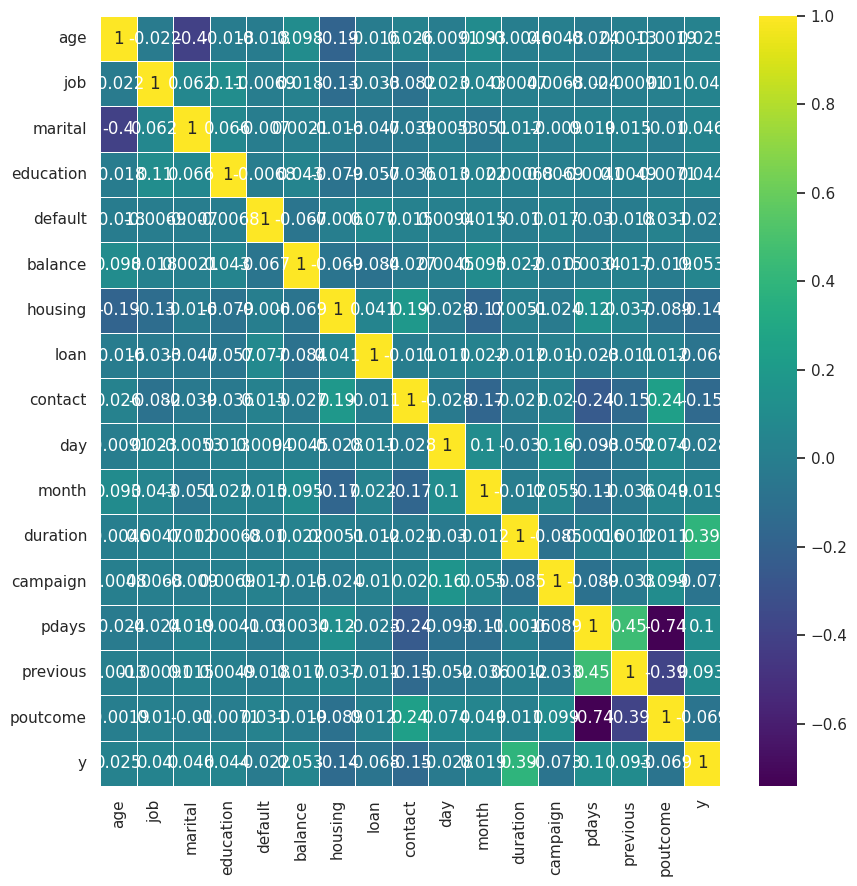

In [571]:
# Calculation all Correlation Coefficients between all variables
correlation_matrix = original_dataset.corr()

# Plotting a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, linewidths=.5, cmap='viridis', annot=True)

## 4) Normalizar

In [572]:
normalized_dataset = new_dataset.copy()
normalized_eval = copy_eval.copy()
normalized_dataset['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [573]:
max_age = normalized_dataset['age'].max()
min_age = normalized_dataset['age'].min()
max_eval = normalized_eval['age'].max()
min_eval = normalized_eval['age'].min()
normalized_eval['age'] = (normalized_eval['age'] - min_eval) / (max_eval - min_eval)
normalized_dataset['age'] = (normalized_dataset['age'] - min_age) / (max_age - min_age)
normalized_dataset['age'].unique()

array([0.51948052, 0.33766234, 0.19480519, 0.37662338, 0.22077922,
       0.12987013, 0.31168831, 0.32467532, 0.2987013 , 0.14285714,
       0.45454545, 0.50649351, 0.42857143, 0.35064935, 0.54545455,
       0.49350649, 0.18181818, 0.09090909, 0.28571429, 0.27272727,
       0.44155844, 0.36363636, 0.23376623, 0.4025974 , 0.53246753,
       0.24675325, 0.41558442, 0.46753247, 0.48051948, 0.38961039,
       0.07792208, 0.25974026, 0.16883117, 0.15584416, 0.11688312,
       0.20779221, 0.06493506, 0.1038961 , 0.55844156, 0.05194805,
       0.03896104, 0.02597403, 0.62337662, 0.57142857, 0.84415584,
       0.74025974, 0.63636364, 0.67532468, 0.61038961, 0.64935065,
       0.5974026 , 0.66233766, 0.7012987 , 0.68831169, 0.01298701,
       0.75324675, 0.87012987, 0.58441558, 0.93506494, 0.83116883,
       0.71428571, 0.72727273, 0.77922078, 0.80519481, 0.98701299,
       0.79220779, 0.76623377, 0.88311688, 1.        , 0.81818182,
       0.        , 0.92207792, 0.85714286, 0.8961039 , 0.96103

In [574]:
normalized_dataset['balance'].unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353])

In [575]:
max_balance = normalized_dataset['balance'].max()
min_balance = normalized_dataset['balance'].min()
max_eval = normalized_eval['balance'].max()
min_eval = normalized_eval['balance'].min()
normalized_eval['balance'] = (normalized_eval['balance'] - min_eval) / (max_eval - min_eval)
normalized_dataset['balance'] = (normalized_dataset['balance'] - min_balance) / (max_balance - min_balance)
normalized_dataset['balance'].unique()

array([0.09225936, 0.07306666, 0.07282153, ..., 0.14729541, 0.20175948,
       0.22126995])

In [576]:
normalized_dataset['duration'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [577]:
max_duration = normalized_dataset['duration'].max()
min_duration = normalized_dataset['duration'].min()
max_eval = normalized_eval['duration'].max()
min_eval = normalized_eval['duration'].min()
normalized_eval['duration'] = (normalized_eval['duration'] - min_eval) / (max_eval - min_eval)
normalized_dataset['duration'] = (normalized_dataset['duration'] - min_duration) / (max_duration - min_duration)
normalized_dataset['duration'].unique()

array([0.05307035, 0.03070354, 0.01545344, ..., 0.26392843, 0.25335502,
       0.31638878])

In [578]:
normalized_dataset['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [579]:
max_campaign = normalized_dataset['campaign'].max()
min_campaign = normalized_dataset['campaign'].min()
max_eval = normalized_eval['campaign'].max()
min_eval = normalized_eval['campaign'].min()
normalized_eval['campaign'] = (normalized_eval['campaign'] - min_eval) / (max_eval - min_eval)
normalized_dataset['campaign'] = (normalized_dataset['campaign'] - min_campaign) / (max_campaign - min_campaign)
normalized_dataset['campaign'].unique()

array([0.        , 0.01612903, 0.03225806, 0.06451613, 0.0483871 ,
       0.08064516, 0.09677419, 0.11290323, 0.12903226, 0.14516129,
       0.16129032, 0.17741935, 0.19354839, 0.29032258, 0.20967742,
       0.37096774, 0.24193548, 0.5       , 0.27419355, 0.33870968,
       0.22580645, 0.25806452, 0.38709677, 0.32258065, 0.67741935,
       0.80645161, 1.        , 0.64516129, 0.40322581, 0.43548387,
       0.87096774, 0.79032258, 0.59677419, 0.35483871, 0.30645161,
       0.4516129 , 0.48387097, 0.58064516, 0.46774194, 0.72580645,
       0.41935484, 0.91935484, 0.51612903, 0.5483871 , 0.53225806,
       0.56451613, 0.61290323, 0.69354839])

In [580]:
normalized_dataset['pdays'].unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [581]:
max_pdays = normalized_dataset['pdays'].max()
min_pdays = normalized_dataset['pdays'].min()
max_eval = normalized_eval['pdays'].max()
min_eval = normalized_eval['pdays'].min()
normalized_eval['pdays'] = (normalized_eval['pdays'] - min_eval) / (max_eval - min_eval)
normalized_dataset['pdays'] = (normalized_dataset['pdays'] - min_pdays) / (max_pdays - min_pdays)
normalized_dataset['pdays'].unique()

array([0.        , 0.17431193, 0.19151376, 0.10550459, 0.09977064,
       0.16513761, 0.16972477, 0.10321101, 0.16169725, 0.20298165,
       0.11697248, 0.20068807, 0.19610092, 0.19266055, 0.22477064,
       0.19036697, 0.14908257, 0.21674312, 0.22591743, 0.1983945 ,
       0.13646789, 0.13761468, 0.12041284, 0.19724771, 0.1353211 ,
       0.18922018, 0.15252294, 0.15137615, 0.14220183, 0.18348624,
       0.21444954, 0.12844037, 0.13302752, 0.13417431, 0.19954128,
       0.20527523, 0.12729358, 0.17545872, 0.11123853, 0.11926606,
       0.17316514, 0.20183486, 0.22247706, 0.2087156 , 0.21330275,
       0.17775229, 0.16743119, 0.15940367, 0.1456422 , 0.20756881,
       0.12614679, 0.18233945, 0.19380734, 0.11238532, 0.20986239,
       0.14678899, 0.15022936, 0.22362385, 0.14449541, 0.12155963,
       0.11811927, 0.0309633 , 0.20642202, 0.03325688, 0.21100917,
       0.17889908, 0.12958716, 0.13876147, 0.15825688, 0.14334862,
       0.21559633, 0.2190367 , 0.13073394, 0.18692661, 0.15481

In [582]:
normalized_dataset['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [583]:
max_previous = normalized_dataset['previous'].max()
min_previous = normalized_dataset['previous'].min()
max_eval = normalized_eval['previous'].max()
min_eval = normalized_eval['previous'].min()
normalized_eval['previous'] = (normalized_eval['previous'] - min_eval) / (max_eval - min_eval)
normalized_dataset['previous'] = (normalized_dataset['previous'] - min_previous) / (max_previous - min_previous)
normalized_dataset['previous'].unique()

array([0.        , 0.01090909, 0.00363636, 0.01454545, 0.00727273,
       0.04      , 0.05818182, 0.02181818, 0.01818182, 0.03636364,
       0.04363636, 0.02545455, 0.06545455, 0.03272727, 0.07636364,
       0.02909091, 0.05090909, 0.05454545, 0.09454545, 0.13454545,
       0.04727273, 0.09090909, 0.07272727, 0.09818182, 0.06181818,
       0.08363636, 0.13818182, 0.10545455, 0.08727273, 0.18545455,
       1.        , 0.08      , 0.06909091, 0.10909091, 0.21090909,
       0.10181818, 0.11636364, 0.14545455, 0.2       , 0.12727273,
       0.14909091])

## Oversampling


In [584]:

augmentation_dataset = normalized_dataset.copy()

augmentation_dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,4,1,2,0,0.092259,1,0,2,5,4,0.053070,0.000000,0.000000,0.000000,3,0
1,0.337662,9,2,1,0,0.073067,1,0,2,5,4,0.030704,0.000000,0.000000,0.000000,3,0
2,0.194805,2,1,1,0,0.072822,1,1,2,5,4,0.015453,0.000000,0.000000,0.000000,3,0
3,0.376623,1,1,7,0,0.086476,1,0,2,5,4,0.018707,0.000000,0.000000,0.000000,3,0
4,0.194805,11,2,7,0,0.072812,0,0,2,5,4,0.040260,0.000000,0.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,9,1,2,0,0.080293,0,0,0,17,10,0.198658,0.032258,0.000000,0.000000,3,1
45207,0.688312,5,0,0,0,0.088501,0,0,0,17,10,0.092721,0.016129,0.000000,0.000000,3,1
45208,0.701299,5,1,1,0,0.124689,0,0,0,17,10,0.229158,0.064516,0.212156,0.010909,2,1
45209,0.506494,1,1,1,0,0.078868,0,0,1,17,10,0.103294,0.048387,0.000000,0.000000,3,0


Class 0 :  39922
Class 1 :  5289


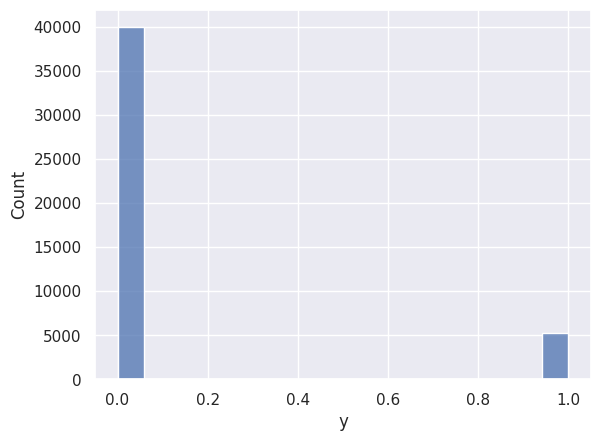

In [585]:
for i in range(len(augmentation_dataset["y"].unique())):
  numRows = len(augmentation_dataset[augmentation_dataset['y'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=augmentation_dataset, x="y")
plt.show()

In [586]:
# Lets extract how many classes there are in class 0
class_cero_count = augmentation_dataset['y'].value_counts()[0]

# Lets oversample the data that belongs to class '1'
oversampled_class_one = augmentation_dataset[augmentation_dataset['y'] == 1].sample(class_cero_count, replace=True)

# Lets preview
class_cero_dataset = augmentation_dataset[augmentation_dataset['y'] == 0]

# Lets merge both datasets
oversampled_dataset = pd.concat([class_cero_dataset, oversampled_class_one])

# Lets shuffle the dataset
oversampled_dataset = oversampled_dataset.sample(frac=1).reset_index(drop=True)

# Lets preview
oversampled_dataset
augmentation_dataset = oversampled_dataset.copy()

Class 0 :  53
Class 1 :  9
Class 2 :  0
Class 3 :  0
Class 4 :  0
Class 5 :  0
Class 6 :  0
Class 7 :  0
Class 8 :  0
Class 9 :  0
Class 10 :  0
Class 11 :  0
Class 12 :  0
Class 13 :  0
Class 14 :  0
Class 15 :  0
Class 16 :  0
Class 17 :  0
Class 18 :  0
Class 19 :  0
Class 20 :  0
Class 21 :  0
Class 22 :  0
Class 23 :  0
Class 24 :  0
Class 25 :  0
Class 26 :  0
Class 27 :  0
Class 28 :  0
Class 29 :  0
Class 30 :  0
Class 31 :  0
Class 32 :  0
Class 33 :  0
Class 34 :  0
Class 35 :  0
Class 36 :  0
Class 37 :  0
Class 38 :  0
Class 39 :  0
Class 40 :  0
Class 41 :  0
Class 42 :  0
Class 43 :  0
Class 44 :  0
Class 45 :  0
Class 46 :  0
Class 47 :  0
Class 48 :  0
Class 49 :  0
Class 50 :  0
Class 51 :  0
Class 52 :  0
Class 53 :  0
Class 54 :  0
Class 55 :  0
Class 56 :  0
Class 57 :  0
Class 58 :  0
Class 59 :  0
Class 60 :  0
Class 61 :  0
Class 62 :  0
Class 63 :  0
Class 64 :  0
Class 65 :  0
Class 66 :  0
Class 67 :  0
Class 68 :  0
Class 69 :  0
Class 70 :  0
Class 71 :  0
C

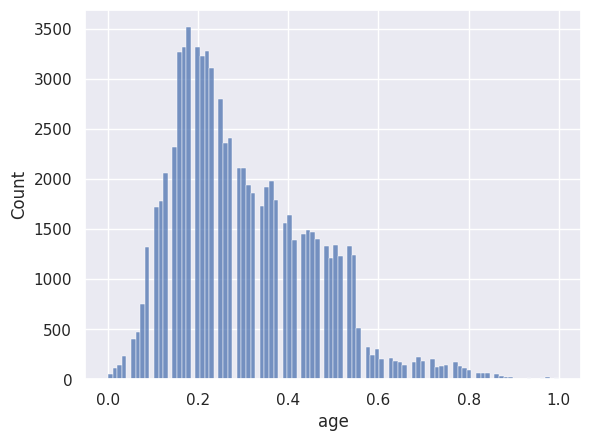

In [587]:
for i in range(len(augmentation_dataset["age"].unique())):
  numRows = len(augmentation_dataset[augmentation_dataset['age'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=augmentation_dataset, x="age")
plt.show()

In [588]:
# Contar cuántas instancias hay por clase
class_counts = augmentation_dataset['age'].value_counts()

# Determinar la clase mayoritaria
max_count = class_counts.max()

# Generar un dataset balanceado con oversampling
oversampled_dfs = []

for class_value, count in class_counts.items():
    class_df = augmentation_dataset[augmentation_dataset['age'] == class_value]
    oversampled_df = class_df.sample(max_count, replace=True)
    oversampled_dfs.append(oversampled_df)

# Concatenar todos los subconjuntos oversampleados
balanced_dataset = pd.concat(oversampled_dfs).sample(frac=1).reset_index(drop=True)

# Reemplazar el dataset original si lo deseas
augmentation_dataset = balanced_dataset.copy()



Class 0 :  268269
Class 1 :  2232


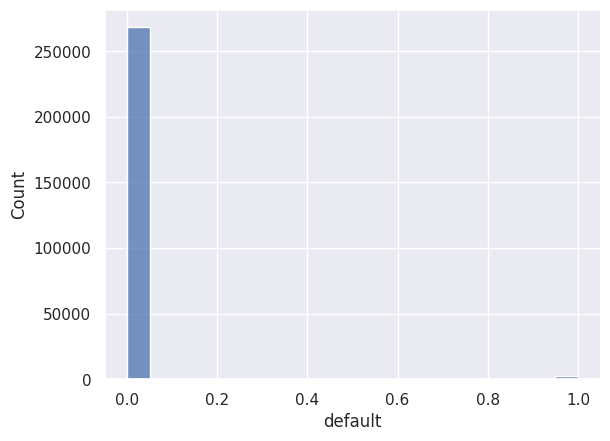

In [595]:
for i in range(len(augmentation_dataset["default"].unique())):
  numRows = len(augmentation_dataset[augmentation_dataset['default'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=augmentation_dataset, x="default")
plt.show()

In [596]:
# Lets extract how many classes there are in class 0
class_cero_count = augmentation_dataset['default'].value_counts()[0]

# Lets oversample the data that belongs to class '1'
oversampled_class_one = augmentation_dataset[augmentation_dataset['default'] == 1].sample(class_cero_count, replace=True)

# Lets preview
class_cero_dataset = augmentation_dataset[augmentation_dataset['default'] == 0]

# Lets merge both datasets
oversampled_dataset = pd.concat([class_cero_dataset, oversampled_class_one])

# Lets shuffle the dataset
oversampled_dataset = oversampled_dataset.sample(frac=1).reset_index(drop=True)

# Lets preview
oversampled_dataset
augmentation_dataset = oversampled_dataset.copy()

Class 0 :  321146
Class 1 :  215392


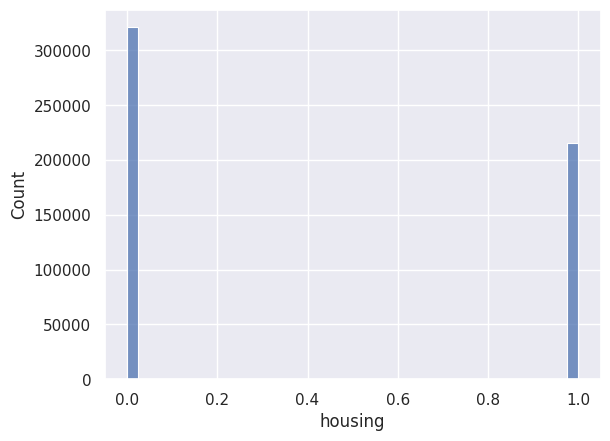

In [598]:
for i in range(len(augmentation_dataset["housing"].unique())):
  numRows = len(augmentation_dataset[augmentation_dataset['housing'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=augmentation_dataset, x="housing")
plt.show()

Class 0 :  2
Class 1 :  4
Class 2 :  0
Class 3 :  0
Class 4 :  0
Class 5 :  0
Class 6 :  0
Class 7 :  0
Class 8 :  0
Class 9 :  0
Class 10 :  0
Class 11 :  0
Class 12 :  0
Class 13 :  0
Class 14 :  0
Class 15 :  0
Class 16 :  0
Class 17 :  0
Class 18 :  0
Class 19 :  0
Class 20 :  0
Class 21 :  0
Class 22 :  0
Class 23 :  0
Class 24 :  0
Class 25 :  0
Class 26 :  0
Class 27 :  0
Class 28 :  0
Class 29 :  0
Class 30 :  0
Class 31 :  0
Class 32 :  0
Class 33 :  0
Class 34 :  0
Class 35 :  0
Class 36 :  0
Class 37 :  0
Class 38 :  0
Class 39 :  0
Class 40 :  0
Class 41 :  0
Class 42 :  0
Class 43 :  0
Class 44 :  0
Class 45 :  0
Class 46 :  0
Class 47 :  0
Class 48 :  0
Class 49 :  0
Class 50 :  0
Class 51 :  0
Class 52 :  0
Class 53 :  0
Class 54 :  0
Class 55 :  0
Class 56 :  0
Class 57 :  0
Class 58 :  0
Class 59 :  0
Class 60 :  0
Class 61 :  0
Class 62 :  0
Class 63 :  0
Class 64 :  0
Class 65 :  0
Class 66 :  0
Class 67 :  0
Class 68 :  0
Class 69 :  0
Class 70 :  0
Class 71 :  0
Cl

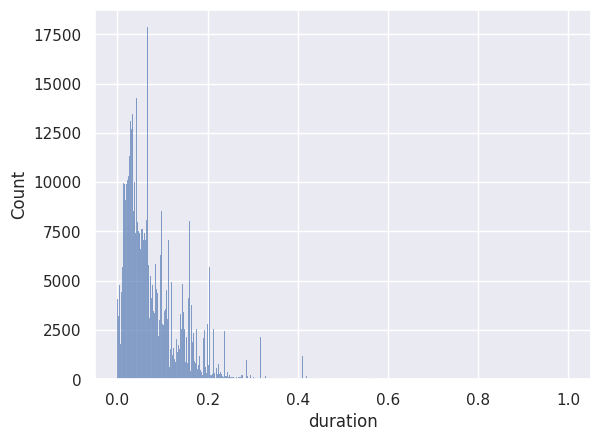

In [605]:
for i in range(len(augmentation_dataset["duration"].unique())):
  numRows = len(augmentation_dataset[augmentation_dataset['duration'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=augmentation_dataset, x="duration")
plt.show()

Class 0 :  226846
Class 1 :  3
Class 2 :  0
Class 3 :  0
Class 4 :  0
Class 5 :  0
Class 6 :  0
Class 7 :  0
Class 8 :  0
Class 9 :  0
Class 10 :  0
Class 11 :  0
Class 12 :  0
Class 13 :  0
Class 14 :  0
Class 15 :  0
Class 16 :  0
Class 17 :  0
Class 18 :  0
Class 19 :  0
Class 20 :  0
Class 21 :  0
Class 22 :  0
Class 23 :  0
Class 24 :  0
Class 25 :  0
Class 26 :  0
Class 27 :  0
Class 28 :  0
Class 29 :  0
Class 30 :  0
Class 31 :  0
Class 32 :  0
Class 33 :  0
Class 34 :  0
Class 35 :  0
Class 36 :  0
Class 37 :  0
Class 38 :  0
Class 39 :  0
Class 40 :  0
Class 41 :  0
Class 42 :  0
Class 43 :  0
Class 44 :  0


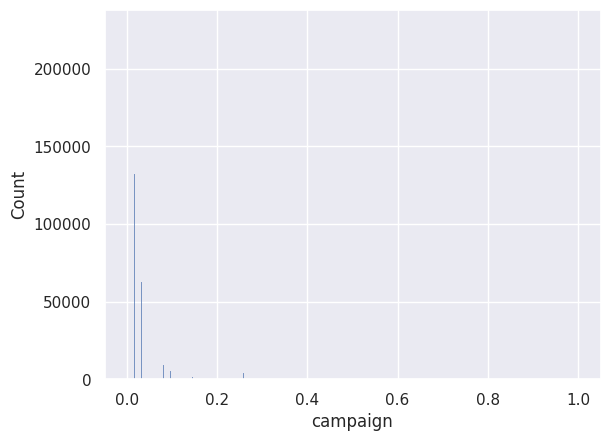

In [606]:
for i in range(len(augmentation_dataset["campaign"].unique())):
  numRows = len(augmentation_dataset[augmentation_dataset['campaign'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=augmentation_dataset, x="campaign")
plt.show()

Class 0 :  436499
Class 1 :  2
Class 2 :  0
Class 3 :  0
Class 4 :  0
Class 5 :  0
Class 6 :  0
Class 7 :  0
Class 8 :  0
Class 9 :  0
Class 10 :  0
Class 11 :  0
Class 12 :  0
Class 13 :  0
Class 14 :  0
Class 15 :  0
Class 16 :  0
Class 17 :  0
Class 18 :  0
Class 19 :  0
Class 20 :  0
Class 21 :  0
Class 22 :  0
Class 23 :  0
Class 24 :  0
Class 25 :  0
Class 26 :  0
Class 27 :  0
Class 28 :  0
Class 29 :  0
Class 30 :  0
Class 31 :  0
Class 32 :  0
Class 33 :  0
Class 34 :  0
Class 35 :  0
Class 36 :  0
Class 37 :  0
Class 38 :  0
Class 39 :  0
Class 40 :  0
Class 41 :  0
Class 42 :  0
Class 43 :  0
Class 44 :  0
Class 45 :  0
Class 46 :  0
Class 47 :  0
Class 48 :  0
Class 49 :  0
Class 50 :  0
Class 51 :  0
Class 52 :  0
Class 53 :  0
Class 54 :  0
Class 55 :  0
Class 56 :  0
Class 57 :  0
Class 58 :  0
Class 59 :  0
Class 60 :  0
Class 61 :  0
Class 62 :  0
Class 63 :  0
Class 64 :  0
Class 65 :  0
Class 66 :  0
Class 67 :  0
Class 68 :  0
Class 69 :  0
Class 70 :  0
Class 71 : 

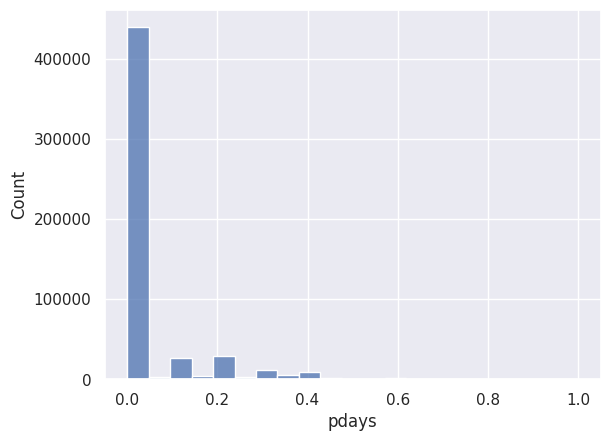

In [607]:
for i in range(len(augmentation_dataset["pdays"].unique())):
  numRows = len(augmentation_dataset[augmentation_dataset['pdays'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=augmentation_dataset, x="pdays")
plt.show()

Class 0 :  436499
Class 1 :  1
Class 2 :  0
Class 3 :  0
Class 4 :  0
Class 5 :  0
Class 6 :  0
Class 7 :  0
Class 8 :  0
Class 9 :  0
Class 10 :  0
Class 11 :  0
Class 12 :  0
Class 13 :  0
Class 14 :  0
Class 15 :  0
Class 16 :  0
Class 17 :  0
Class 18 :  0
Class 19 :  0
Class 20 :  0
Class 21 :  0
Class 22 :  0
Class 23 :  0
Class 24 :  0
Class 25 :  0
Class 26 :  0
Class 27 :  0
Class 28 :  0
Class 29 :  0
Class 30 :  0
Class 31 :  0
Class 32 :  0
Class 33 :  0
Class 34 :  0
Class 35 :  0
Class 36 :  0
Class 37 :  0
Class 38 :  0


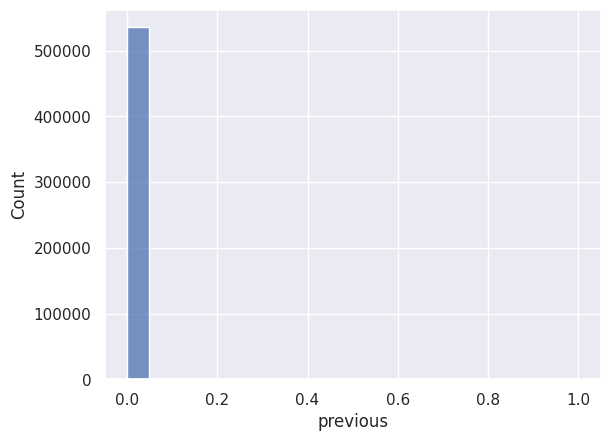

In [608]:
for i in range(len(augmentation_dataset["previous"].unique())):
  numRows = len(augmentation_dataset[augmentation_dataset['previous'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=augmentation_dataset, x="previous")
plt.show()

In [610]:
# Obtener el conteo máximo (oversampling) o mínimo (undersampling)
target_count = max(augmentation_dataset['poutcome'].value_counts())

# Lista para guardar los datos balanceados
balanced_dfs = []

# Recorrer cada clase presente
for cls in augmentation_dataset['poutcome'].unique():
    class_df = augmentation_dataset[augmentation_dataset['poutcome'] == cls]

    # Si la clase tiene menos elementos que el target_count, la sobremuestreamos
    if len(class_df) < target_count:
        sampled_df = class_df.sample(target_count, replace=True, random_state=42)
    else:
        sampled_df = class_df.sample(target_count, replace=False, random_state=42)

    balanced_dfs.append(sampled_df)

# Concatenar todo y mezclar
balanced_poutcome_dataset = pd.concat(balanced_dfs).sample(frac=1).reset_index(drop=True)

# Reemplazar el dataset original
augmentation_dataset = balanced_poutcome_dataset.copy()


In [611]:
# Lets extract how many classes there are in class 0
class_cero_count = augmentation_dataset['y'].value_counts()[0]

# Lets oversample the data that belongs to class '1'
oversampled_class_one = augmentation_dataset[augmentation_dataset['y'] == 1].sample(class_cero_count, replace=True)

# Lets preview
class_cero_dataset = augmentation_dataset[augmentation_dataset['y'] == 0]

# Lets merge both datasets
oversampled_dataset = pd.concat([class_cero_dataset, oversampled_class_one])

# Lets shuffle the dataset
oversampled_dataset = oversampled_dataset.sample(frac=1).reset_index(drop=True)

# Lets preview
oversampled_dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.298701,6,1,1,1,0.072803,1,0,0,17,10,0.160431,0.000000,0.000000,0.000000,3,1
1,0.233766,1,2,7,1,0.069217,1,0,1,7,6,0.001830,0.258065,0.000000,0.000000,3,0
2,0.519481,7,0,1,0,0.076998,0,0,0,13,10,0.100651,0.000000,0.107798,0.003636,2,1
3,0.584416,2,1,1,0,0.108247,0,0,1,4,7,0.050834,0.016129,0.215596,0.007273,2,1
4,0.025974,8,2,1,0,0.089318,0,0,0,9,3,0.049817,0.032258,0.000000,0.000000,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984419,0.298701,7,1,7,1,0.072794,0,1,0,30,6,0.238105,0.048387,0.000000,0.000000,3,1
984420,0.168831,1,1,1,0,0.105968,1,1,0,21,10,0.051240,0.000000,0.193807,0.014545,0,0
984421,0.454545,4,1,2,0,0.105796,0,0,0,7,4,0.042904,0.048387,0.102064,0.029091,2,1
984422,0.974026,5,1,7,0,0.079839,0,0,0,22,6,0.174868,0.016129,0.204128,0.025455,2,1


In [612]:
augmentation_dataset = oversampled_dataset.copy()

Class 0 :  492212
Class 1 :  492212


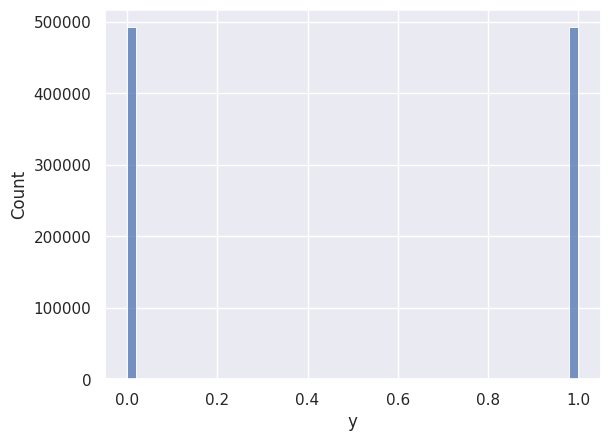

In [613]:
for i in range(len(augmentation_dataset["y"].unique())):
  numRows = len(augmentation_dataset[augmentation_dataset['y'] == i])
  print("Class", i, ": ", numRows)

# Setting style of the graph
sns.set(style="darkgrid")

# Plotting a histogram
sns.histplot(data=augmentation_dataset, x="y")
plt.show()

## Modelo


In [614]:
# Splitting dataset into training and testing
train, test = train_test_split(augmentation_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables
independent_variables = list(augmentation_dataset.columns)
independent_variables.remove('y')
dependent_variables = ['y']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [615]:
# Lets build the model. NOTE: this is the construction of the architecture of the model!

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(len(independent_variables),)), # Changed input_shape to a tuple
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=16, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='sigmoid')
  ])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Now lets train the model!
model.fit(train_set,
          train_target,
          epochs=25,
          batch_size = 128,
          validation_split=0.2
        )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/25
4923/4923 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7721 - loss: 0.4962 - val_accuracy: 0.8660 - val_loss: 0.3313
Epoch 2/25
4923/4923 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8766 - loss: 0.3037 - val_accuracy: 0.8884 - val_loss: 0.2733
Epoch 3/25
4923/4923 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8871 - loss: 0.2763 - val_accuracy: 0.8978 - val_loss: 0.2593
Epoch 4/25
4923/4923 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8939 - loss: 0.2630 - val_accuracy: 0.8981 - val_loss: 0.2556
Epoch 5/25
4923/4923 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8995 - loss: 0.2525 - val_accuracy: 0.8894 - val_loss: 0.2638
Epoch 6/25
4923/4923 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9020 - loss: 0.2446 - val_accuracy: 0.9027 - val_loss: 0.2366
Epoch 7/25
4923/4923 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9035 - loss: 0.2386 - val_accuracy: 0.8993 - val_loss: 0.2457
Epoch 8/25
4923/4923 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9057 - loss: 0

In [616]:
model.evaluate(x=test_set, y=test_target, batch_size=128)

1539/1539 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9194 - loss: 0.1980


[0.19834955036640167, 0.9192472696304321]

In [617]:
# Dividir el dataset
train_eval, test_eval = train_test_split(normalized_eval, test_size=0.2)

# Separar variables independientes y dependientes
independent_variables = list(normalized_eval.columns)
independent_variables.remove('y')
dependent_variables = ['y']

# Preparar subconjuntos de prueba
test_set_eval = test_eval[independent_variables]
test_target_eval = test_eval[dependent_variables]

In [618]:

model.evaluate(x=test_set_eval, y=test_target_eval, batch_size=128)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6848 - loss: 0.7449 


[0.7274466753005981, 0.6895027756690979]

## Modelo 2


In [619]:

import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',   # si tienes más de 2 clases en 'y'
    num_class=len(augmentation_dataset['y'].unique()),  # número de clases
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(train_set, train_target.values.ravel())

# Evaluación
xgb_predictions = xgb_model.predict(test_set_eval)
print("\nReporte de clasificación:\n", classification_report(test_target_eval, xgb_predictions))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:07:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       806
           1       0.35      0.64      0.45        99

    accuracy                           0.83       905
   macro avg       0.65      0.75      0.68       905
weighted avg       0.88      0.83      0.85       905



## MODELO 3

In [620]:
# Aqui comenzamos la creacion del modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_set.shape[1],)), # Reemplazar X_train_balanced con train_set
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(16, activation='relu'),

    Dense(1, activation='sigmoid')  # Salida binaria
])

# Compilamos el modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Agregamos Callbacks para monitorear y controlar el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True) # Si el val_loss no disminuye durante 5 epochs se detiene el entrenamiento
checkpoint = ModelCheckpoint("mejor_modelo.h5", save_best_only=True, monitor='val_loss') # Guarda el modelo

# Resumen del Modelo
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 128 (512.00 B)

In [623]:
history = model.fit(
   train_set,
          train_target,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accuracy: 0.8922 - loss: 0.2587 - val_accuracy: 0.9161 - val_loss: 0.2133
Epoch 2/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.8927 - loss: 0.2577 - val_accuracy: 0.9158 - val_loss: 0.2129
Epoch 3/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - accuracy: 0.8919 - loss: 0.2581 - val_accuracy: 0.9146 - val_loss: 0.2173
Epoch 4/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 132s 4ms/step - accuracy: 0.8930 - loss: 0.2559 - val_accuracy: 0.9184 - val_loss: 0.2089
Epoch 5/100
19683/19689 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8935 - loss: 0.2564

19689/19689 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - accuracy: 0.8935 - loss: 0.2564 - val_accuracy: 0.9175 - val_loss: 0.2059
Epoch 6/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accuracy: 0.8941 - loss: 0.2537 - val_accuracy: 0.9155 - val_loss: 0.2187
Epoch 7/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accuracy: 0.8938 - loss: 0.2552 - val_accuracy: 0.9151 - val_loss: 0.2097
Epoch 8/100
19681/19689 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8941 - loss: 0.2538

19689/19689 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.8941 - loss: 0.2538 - val_accuracy: 0.9162 - val_loss: 0.2055
Epoch 9/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.8947 - loss: 0.2528 - val_accuracy: 0.9155 - val_loss: 0.2077
Epoch 10/100
19677/19689 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8939 - loss: 0.2541

19689/19689 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.8939 - loss: 0.2541 - val_accuracy: 0.9186 - val_loss: 0.2041
Epoch 11/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - accuracy: 0.8948 - loss: 0.2520 - val_accuracy: 0.9153 - val_loss: 0.2147
Epoch 12/100
19683/19689 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8951 - loss: 0.2521

19689/19689 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accuracy: 0.8951 - loss: 0.2521 - val_accuracy: 0.9194 - val_loss: 0.2039
Epoch 13/100
19672/19689 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8955 - loss: 0.2511

19689/19689 ━━━━━━━━━━━━━━━━━━━━ 72s 4ms/step - accuracy: 0.8955 - loss: 0.2511 - val_accuracy: 0.9208 - val_loss: 0.2013
Epoch 14/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 72s 4ms/step - accuracy: 0.8948 - loss: 0.2509 - val_accuracy: 0.9174 - val_loss: 0.2088
Epoch 15/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 94s 4ms/step - accuracy: 0.8960 - loss: 0.2496 - val_accuracy: 0.9196 - val_loss: 0.2055
Epoch 16/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.8964 - loss: 0.2489 - val_accuracy: 0.9165 - val_loss: 0.2128
Epoch 17/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.8957 - loss: 0.2511 - val_accuracy: 0.9199 - val_loss: 0.2032
Epoch 18/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - accuracy: 0.8951 - loss: 0.2501 - val_accuracy: 0.9194 - val_loss: 0.2088
Epoch 19/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accuracy: 0.8964 - loss: 0.2487 - val_accuracy: 0.9155 - val_loss: 0.2094
Epoch 20/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - accurac

19689/19689 ━━━━━━━━━━━━━━━━━━━━ 72s 4ms/step - accuracy: 0.8965 - loss: 0.2486 - val_accuracy: 0.9241 - val_loss: 0.1979
Epoch 22/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.8957 - loss: 0.2484 - val_accuracy: 0.9167 - val_loss: 0.2090
Epoch 23/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.8969 - loss: 0.2483 - val_accuracy: 0.9213 - val_loss: 0.2043
Epoch 24/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 72s 4ms/step - accuracy: 0.8959 - loss: 0.2491 - val_accuracy: 0.9171 - val_loss: 0.2078
Epoch 25/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.8960 - loss: 0.2496 - val_accuracy: 0.9178 - val_loss: 0.2024
Epoch 26/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - accuracy: 0.8968 - loss: 0.2479 - val_accuracy: 0.9220 - val_loss: 0.2040
Epoch 27/100
19689/19689 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - accuracy: 0.8974 - loss: 0.2468 - val_accuracy: 0.9223 - val_loss: 0.2007
Epoch 28/100


KeyboardInterrupt: 

In [624]:
model.evaluate(test_set_eval, test_target_eval, batch_size=32)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6600 - loss: 0.5891


[0.5835217833518982, 0.6651933789253235]